In [8]:
import spacy
import en_core_web_sm
import nltk
nlp = en_core_web_sm.load()
import speech_recognition as sr
from textblob import TextBlob as blob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')                # Valence Aware Dictionary and Sentiment Reasoner, it's a Lexicon tool
import matplotlib.pyplot as plt
#from matplotlib.animation import FuncAnimation
from threading import Thread
import time
#import pyttsx3
import sounddevice as sd
import numpy as np
#engine = pyttsx3.init()
r = sr.Recognizer()
from concurrent.futures import ThreadPoolExecutor
from os import system
import subprocess

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/heisenberg/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [18]:
def tone_analyzer():

    negative_tone,positive_tone,aggregated_tone,neutral_tone = [],[],[],[]

    nltk_analyzer = SentimentIntensityAnalyzer()
    with sr.Microphone() as source:              # Considering Microphone as Source
        print('Please Speak Something...\n')  
        audio = r.listen(source, timeout=2)      # Timeout, if microphone won't get any input witihn 2 seconds, stop recording   
        try:
            text = r.recognize_google(audio)     # Speech to Text with recognize_google
            tb = blob(text)
            print(f'This is what you have just spoken : {text} \n')
            print('Lets analyze it \n')
            negative_tone.append(nltk_analyzer.polarity_scores(text)['neg'])
            positive_tone.append(nltk_analyzer.polarity_scores(text)['pos'])
            aggregated_tone.append(nltk_analyzer.polarity_scores(text)['compound'])
            neutral_tone.append(nltk_analyzer.polarity_scores(text)['neu'])
            [print(f'{i[0]:{10}} {spacy.explain(i[1]):{10}}') for i in tb.tags]
            print('\n')
        except:
            print('I didnt hear anything, please speak again')

    sentiment = []
    if aggregated_tone[0] >= 0.05 : 
        sentiment.append("POSTIVE") 
    elif aggregated_tone[0] <= - 0.05 : 
        sentiment.append("NEGATIVE") 
    else : 
        sentiment.append("NEUTRAL")

    new_text = f'Whatever you just have spoken, sounds {round(negative_tone[0]*100)} % Negative, {round(positive_tone[0]*100)}% Positive, {round(neutral_tone[0]*100)} % Neutral and on an average it\'s a {sentiment[0]} tone'
    print(new_text)
    subprocess.call(["say",new_text])
    #system(f"echo {new_text}")
    
def tone_amplitude():
    fs=44100
    duration = 5  # seconds
    myrecording = sd.rec(duration * fs, samplerate=fs, channels=2,dtype='float64')
    sd.wait()
    fig = plt.figure()
    s = fig.add_subplot(111)
    amplitude = np.fromstring(myrecording)
    s.plot(amplitude)

Please Speak Something...



/Users/heisenberg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


This is what you have just spoken : you are such an arrogant man 

Lets analyze it 

you        pronoun, personal
are        verb, non-3rd person singular present
such       adjective 
an         determiner
arrogant   adjective 
man        noun, singular or mass


Whatever you just have spoken, sounds 39 % Negative, 0% Positive, 61 % Neutral and on an average it's a NEGATIVE tone
None
None


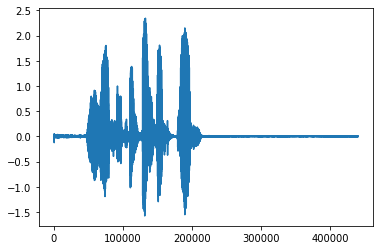

In [20]:
executors_list = []

with ThreadPoolExecutor(max_workers=2) as executor:
    executors_list.append(executor.submit(tone_analyzer))
    executors_list.append(executor.submit(tone_amplitude))

for x in executors_list:
    print(x.result())

In [13]:
text = 'alright lets play'
system(f'say {text}')
subprocess.call(["say",text])

0